In [16]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import stephenHeadConfig as conf
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py


import mpld3
mpld3.enable_notebook()

In [ ]:
%%javascript
Jupyter.utils.load_extensions('vim_binding/vim_binding')

In [ ]:
import multiResData
reload(multiResData)

multiResData.createDB()

In [1]:
import headTrain
reload(headTrain)
headTrain.train()

Initialized the network
 Iter 0, Training Loss= 81896.492188
 Iter 0, Minibatch Loss= 81897.069712
Saved state to /home/mayank/work/tensorflow/cacheHead/head_0.ckpt
 Iter 30, Training Loss= 1599.697266
 Iter 30, Minibatch Loss= 1599.618873
 Iter 60, Training Loss= 622.314270
 Iter 60, Minibatch Loss= 622.262538
 Iter 90, Training Loss= 569.365906
 Iter 90, Minibatch Loss= 569.341499
 Iter 120, Training Loss= 550.858032
 Iter 120, Minibatch Loss= 550.835787
 Iter 150, Training Loss= 550.731384
 Iter 150, Minibatch Loss= 550.723497
 Iter 180, Training Loss= 548.780945
 Iter 180, Minibatch Loss= 548.785635
 Iter 210, Training Loss= 543.296631
 Iter 210, Minibatch Loss= 543.350814
 Iter 240, Training Loss= 538.049011
 Iter 240, Minibatch Loss= 538.030778
 Iter 270, Training Loss= 532.915283
 Iter 270, Minibatch Loss= 533.028616
 Iter 300, Training Loss= 527.331116
 Iter 300, Minibatch Loss= 527.287668
 Iter 330, Training Loss= 523.020935
 Iter 330, Minibatch Loss= 522.853685
 Iter 360, Tra

In [7]:
print(conf.nfcfile)

512


In [1]:
import tensorflow as tf

import os,sys
sys.path.append('/home/mayank/work/caffe/python')

import caffe
import lmdb
import caffe.proto.caffe_pb2

from caffe.io import datum_to_array
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import multiPawTools
import math
from convNetBase import *
import stephenHeadConfig as conf

In [2]:
# Network Parameters
n_input = conf.psz
n_classes = conf.n_classes # 
dropout = conf.dropout # Dropout, probability to keep units
imsz = conf.imsz
# tf Graph input
keep_prob = tf.placeholder(tf.float32) # dropout(keep probability)

x0 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.rescale,
                                 imsz[1]/conf.rescale,1])
x1 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.scale/conf.rescale,
                                 imsz[1]/conf.scale/conf.rescale,1])
x2 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.scale/conf.scale/conf.rescale,
                                 imsz[1]/conf.scale/conf.scale/conf.rescale,1])

lsz0 = int(math.ceil(float(imsz[0])/conf.pool_scale/conf.rescale))
lsz1 = int(math.ceil(float(imsz[1])/conf.pool_scale/conf.rescale))
y = tf.placeholder(tf.float32, [None, lsz0,lsz1,n_classes])

weights = initNetConvWeights(conf)

In [4]:
#     lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
#     vallmdbfilename =os.path.join(conf.cachedir,conf.valfilename)
#     env = lmdb.open(lmdbfilename, readonly = True)
#     valenv = lmdb.open(vallmdbfilename, readonly = True)
#     txn = env.begin()
#     valtxn = valenv.begin()

# Construct model
pred = net_multi_conv(x0,x1,x2, weights, keep_prob,
                      imsz,conf.rescale,conf.pool_scale)


# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.l2_loss(pred- y))

init = tf.initialize_all_variables()
saver = tf.train.Saver()

sess = tf.InteractiveSession()

sess.run(init)

saver.restore(sess, 'cacheHead/head_20000.ckpt')
 

# val_xs, locs = multiPawTools.readLMDB(val_cursor,batch_size*4,n_classes)
# x0_in = multiPawTools.scaleImages(val_xs.transpose([0,2,3,1]),conf.rescale)
# x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
# x2_in = multiPawTools.scaleImages(x1_in,conf.scale)
# labelims = multiPawTools.createLabelImages(locs,
#                            conf.imsz,conf.pool_scale*conf.rescale,
#                            conf.label_blur_rad,1)
# out = sess.run([pred,cost], feed_dict={x0:x0_in,
#                                  x1:x1_in,
#                                  x2:x2_in,
#                            y: labelims, keep_prob: 1.})

In [79]:
import h5py
import multiResData

L = h5py.File(conf.labelfile)
pts = np.array(L['pts'])
ts = np.array(L['ts']).squeeze().astype('int')
expid = np.array(L['expidx']).squeeze().astype('int')

isval,localdirs,seldirs = multiResData.loadValdata(conf)



[102, 88, 59, 16, 101, 77, 53, 29, 40, 81, 92, 6, 45, 84, 67, 60, 99, 73, 36, 1, 18, 75, 76, 93, 13, 71, 41, 48, 31, 14, 3]
(array([14, 15, 16]),)


108
112
113
886
1032
78
207
159
125
234
196
211
601
9
207
86
113
108
208
15
195
212
202
379
5
206
51
125
3
44


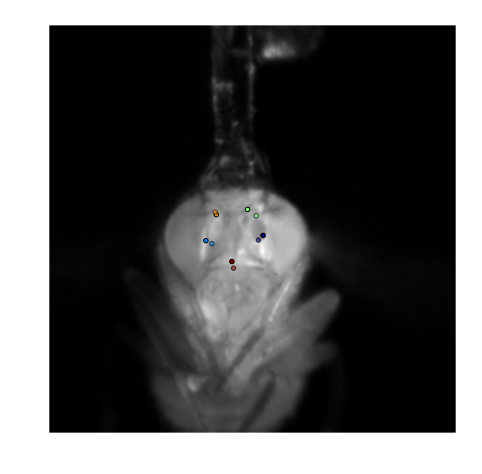

In [128]:
import cv2
import matplotlib.animation as manimation
sys.path.append('/home/mayank/work/pyutils')
import myutils
import matplotlib
import tempfile
import h5py
from matplotlib import cm
import random

fig = plt.figure(figsize = (8,8))
allidx = np.zeros((0))
L = h5py.File(conf.labelfile)
pts = np.array(L['pts'])
ts = np.array(L['ts']).squeeze().astype('int')
expid = np.array(L['expidx']).squeeze().astype('int')

for pcount in range(30):
    valnum = random.randrange(len(isval))
    selpts = np.where(expid==(isval[valnum]+1))

    isval,localdirs,seldirs = multiResData.loadValdata(conf)

    idx = np.random.choice(selpts[0])
    allidx = np.append(allidx,idx)
    print(idx)
    expnum = expid[idx]-1
    fnum = ts[idx]-1
    lpts = pts[idx,:,1,:]
    assert(isval.count(expnum)>0)
    curvid = localdirs[expnum]
    tdir = tempfile.mkdtemp()
    # plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
    # FFMpegWriter = manimation.writers['mencoder_file']
    # writer = FFMpegWriter(fps=15,bitrate=2000)


    cap = cv2.VideoCapture(curvid)
    nframes = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
    plt.gray()
    # with writer.saving(fig,"test_results.mp4",4):
    count = 0
#     vidfilename = 'head_detect.avi'
    crop = conf.cropsz
    # for fnum in range(fnum,fnum+1):#range(nframes):
    plt.clf()
    framein = myutils.readframe(cap,fnum)
    framein = framein[np.newaxis,crop:-crop,crop:-crop,0:1]
    x0_in = multiPawTools.scaleImages(framein,conf.rescale)
    x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
    x2_in = multiPawTools.scaleImages(x1_in,conf.scale)

    lsz0 = int(math.ceil(float(imsz[0])/conf.pool_scale/conf.rescale))
    lsz1 = int(math.ceil(float(imsz[1])/conf.pool_scale/conf.rescale))

    labelim = np.zeros([1,lsz0,lsz1,conf.n_classes])
    out = sess.run(pred, feed_dict={x0:x0_in,
                     x1:x1_in,
                     x2:x2_in,
                     y:labelim,
                     keep_prob: 1.})
    plt.imshow(x0_in[0,:,:,0])

    loc = np.zeros((0,2))
    for pp in range(out.shape[3]):
        maxndx = np.argmax(out[0,:,:,pp])
        curloc = np.array(np.unravel_index(maxndx,out.shape[1:3]))
        loc = np.append(loc,curloc[np.newaxis,:]*4,axis=0)
    plt.scatter(loc[:,1],loc[:,0],c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet)
    plt.scatter((lpts[:,0]-200)/conf.rescale,(lpts[:,1]-200)/conf.rescale,
                    c=np.linspace(0,1,conf.n_classes),hold=True,alpha=0.6,cmap=cm.jet)
    # fname = "test_{:06d}.png".format(count)
    #     plt.savefig(os.path.join(tdir,fname))
    #     count+=1
    #     plt.imshow(out[0,:,:,0])
    plt.axis('off')
    fname = "head_result_val_{:d}.png".format(pcount)
    plt.savefig(os.path.join('results','headResults',fname))

    #         writer.grab_frame()

    # ffmpeg_cmd = "ffmpeg -r 30 " + \
    # "-f image2 -i '/path/to/your/picName%d.png' -qscale 0 '/path/to/your/new/video.avi'

    # tfilestr = os.path.join(tdir,'test_*.png')
    # mencoder_cmd = "mencoder mf://" + tfilestr + \
    # " -frames " + "{:d}".format(count) + " -mf type=png:fps=15 -o " + \
    # vidfilename + " -ovc lavc -lavcopts vcodec=mpeg4:vbitrate=2000000"
    # print(mencoder_cmd)
    # os.system(mencoder_cmd)
    cap.release()


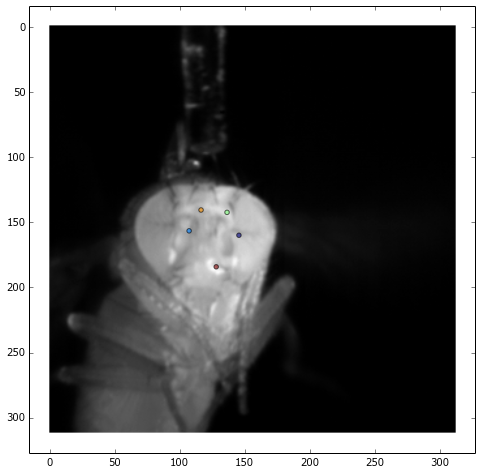

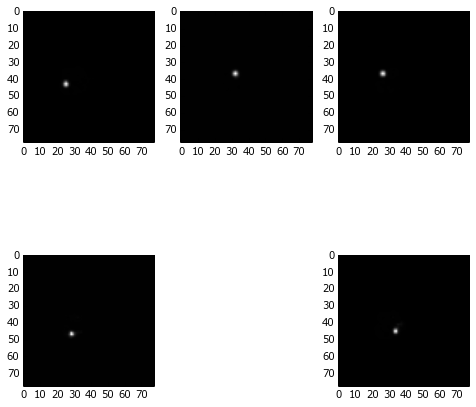

In [136]:
ptsel = 9
idx = int(allidx[ptsel])
expnum = expid[idx]-1
fnum = ts[idx]-1
lpts = pts[idx,:,1,:]

fig = plt.figure(figsize=(8,8))
assert(isval.count(expnum)>0)
curvid = localdirs[expnum]
tdir = tempfile.mkdtemp()
# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
# FFMpegWriter = manimation.writers['mencoder_file']
# writer = FFMpegWriter(fps=15,bitrate=2000)


cap = cv2.VideoCapture(curvid)
nframes = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
plt.gray()
# with writer.saving(fig,"test_results.mp4",4):
count = 0
#     vidfilename = 'head_detect.avi'
crop = conf.cropsz
# for fnum in range(fnum,fnum+1):#range(nframes):
plt.clf()
framein = myutils.readframe(cap,fnum)
framein = framein[np.newaxis,crop:-crop,crop:-crop,0:1]
x0_in = multiPawTools.scaleImages(framein,conf.rescale)
x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
x2_in = multiPawTools.scaleImages(x1_in,conf.scale)

lsz0 = int(math.ceil(float(imsz[0])/conf.pool_scale/conf.rescale))
lsz1 = int(math.ceil(float(imsz[1])/conf.pool_scale/conf.rescale))

labelim = np.zeros([1,lsz0,lsz1,conf.n_classes])
out = sess.run(pred, feed_dict={x0:x0_in,
                 x1:x1_in,
                 x2:x2_in,
                 y:labelim,
                 keep_prob: 1.})

framein = multiPawTools.scaleImages(framein,conf.rescale)
framein = framein[0,:,:,0]
plt.imshow(framein)
plt.scatter((lpts[:,0]-200)/conf.rescale,(lpts[:,1]-200)/conf.rescale,
                    c=np.linspace(0,1,conf.n_classes),hold=True,alpha=0.6,cmap=cm.jet)
# plt.savefig(os.path.join('results/headResults/labelError.png'))
plt.show()
fig1 = plt.figure(figsize = (8,8))
plt.gray()
for pndx in range(5):
    plt.subplot(2,3,pndx)
    plt.imshow(out[0,:,:,pndx])

In [108]:
zz = np.zeros((0,2))
print(zz.shape)
kk = np.zeros((2,))
print(kk[np.newaxis,:].shape)
zz = np.append(zz,kk[np.newaxis,:],axis = 0)
print(zz)

(0, 2)
(1, 2)
[[ 0.  0.]]
